<a href="https://colab.research.google.com/github/Usmantech125/salary-prediction/blob/main/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction using Machine Learning

This project demonstrates how to predict salaries based on various features such as **education level, job title, and gender**. We will go through data preprocessing, exploratory data analysis (EDA), model building, and evaluation.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Dataset Overview
Let's load the dataset and check its basic structure.

In [ ]:
df = pd.read_csv('/content/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Data Cleaning
Check for missing values and handle them appropriately.

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

## Exploratory Data Analysis (EDA)
Let's explore the dataset with some visualizations.

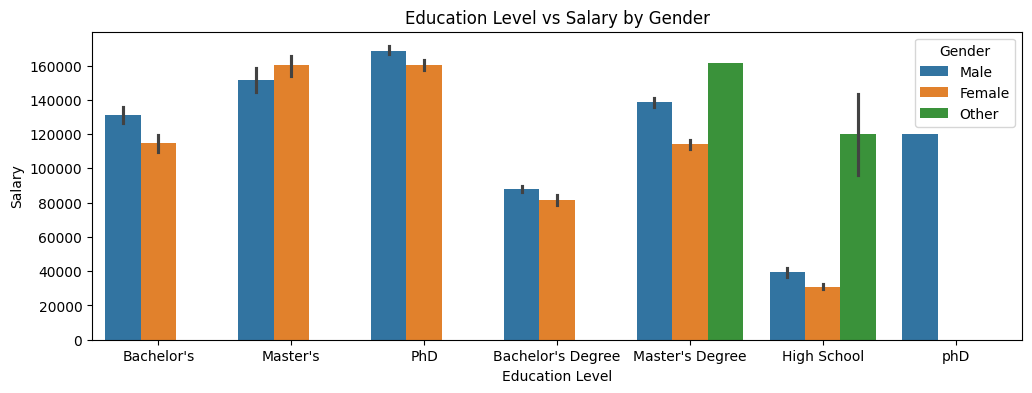

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x='Education Level', y='Salary', data=df, hue='Gender')
plt.title('Education Level vs Salary by Gender')
plt.show()

## Feature Engineering
Convert categorical variables into numerical representations for modeling.

In [ ]:
education_mapping = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
df['Education Level'] = df['Education Level'].map(education_mapping)

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-hot encoding for Job Titles
df = pd.get_dummies(df, columns=['Job Title'], drop_first=True)
df.dropna(inplace=True)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,1,1.0,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,0,2.0,3.0,65000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,1,3.0,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,0,1.0,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,1,2.0,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Train-Test Split
Divide the data into training and testing sets.

In [ ]:
X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((2288, 194), (572, 194))

## Model Training
We will train both **Linear Regression** and **Random Forest Regressor** and compare their performance.

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

## Model Evaluation
Compare models using R² score and RMSE.

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} -> R²: {r2:.3f}, RMSE: {rmse:.2f}")

evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_rfr, 'Random Forest Regressor')

Linear Regression -> R²: 0.908, RMSE: 17942.12
Random Forest Regressor -> R²: 0.983, RMSE: 7790.16


## Conclusion
- We compared multiple machine learning models for predicting salaries.
- The model with the best R² score and lowest RMSE is recommended.
- Key insights:
  * Higher education levels (Master's, PhD) tend to correlate with higher salaries.
  * Gender and job title also influence salary distributions.

**Next Steps:** Experiment with more advanced models (XGBoost, Neural Networks) and hyperparameter tuning.